# HW1 - Applied Quantitative Logistics

Instruction for submission:

- Please create a private GitHub repository then commit your solution to your repository.

- Deadline: **February 13, 2025, 11:59 pm.**

- Please replace **Your_Name** by your full-name : **[HW1_AQL]-YOUR_NAME**

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [Majid-Sohrabi](https://github.com/Majid-Sohrabi) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

## Binary SA

**Problem:** Min One
$$
\min{z} = f(x) = \begin{equation*}
\sum_{i=1}^n x_i \end{equation*}
$$

$$
x_i \in \{0, 1\}
$$

In [7]:
# Updating SA methods to track cost progression over iterations

# Binary SA with cost tracking
def binary_sa(n, max_iter=1000, initial_temp=100, cooling_rate=0.95):
    current_solution = np.random.randint(0, 2, size=n)
    current_cost = np.sum(current_solution)

    best_solution = current_solution
    best_cost = current_cost

    temperature = initial_temp
    cost_progression = [current_cost]

    for _ in range(max_iter):
        neighbor_solution = current_solution.copy()
        flip_index = np.random.randint(0, n)
        neighbor_solution[flip_index] = 1 - neighbor_solution[flip_index]
        neighbor_cost = np.sum(neighbor_solution)

        delta_cost = neighbor_cost - current_cost
        if delta_cost < 0 or np.random.rand() < np.exp(-delta_cost / temperature):
            current_solution = neighbor_solution
            current_cost = neighbor_cost

        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

        cost_progression.append(best_cost)
        temperature *= cooling_rate

    return best_solution, best_cost, cost_progression


Improve SA quality:

Application in high dimension (more complex) problems when one sulution does not work well.

- How to improve?

### 1. Making parallel SA under one algorithm (no interaction between solutions)

<img src="Picture1.png" width="400">


Note: In this case the best solution out of 3 will be best solution for the next iteration.

In [11]:
# Parallel SA (No Interaction) with cost tracking
def parallel_sa_no_interaction(n, population_size=10, max_iter=1000, initial_temp=100, cooling_rate=0.95):
    population = [np.random.randint(0, 2, size=n) for _ in range(population_size)]
    costs = [np.sum(individual) for individual in population]

    best_solution = population[np.argmin(costs)]
    best_cost = min(costs)

    temperature = initial_temp
    cost_progression = [best_cost]

    for _ in range(max_iter):
        new_population = []

        for i in range(population_size):
            individual = population[i]
            flip_index = np.random.randint(0, n)
            neighbor = individual.copy()
            neighbor[flip_index] = 1 - neighbor[flip_index]
            neighbor_cost = np.sum(neighbor)

            if neighbor_cost < costs[i] or np.random.rand() < np.exp(-(neighbor_cost - costs[i]) / temperature):
                population[i] = neighbor
                costs[i] = neighbor_cost

        min_cost_index = np.argmin(costs)
        if costs[min_cost_index] < best_cost:
            best_solution = population[min_cost_index]
            best_cost = costs[min_cost_index]

        cost_progression.append(best_cost)
        temperature *= cooling_rate

    return best_solution, best_cost, cost_progression

### 2. Making SA based on population by interaction.

<img src="Picture2.png" width="400">

Note: In this case at each time we make several neighbours, then compare the best neighbours by current solutions.

In [12]:

# Population by Interaction SA with cost tracking
def population_by_interaction_sa(n, population_size=10, max_iter=1000, initial_temp=100, cooling_rate=0.95):
    population = [np.random.randint(0, 2, size=n) for _ in range(population_size)]
    costs = [np.sum(individual) for individual in population]

    best_solution = population[np.argmin(costs)]
    best_cost = min(costs)

    temperature = initial_temp
    cost_progression = [best_cost]

    for _ in range(max_iter):
        new_population = []

        for i in range(population_size):
            individual = population[i]
            neighbors = [individual.copy() for _ in range(3)]
            for neighbor in neighbors:
                flip_index = np.random.randint(0, n)
                neighbor[flip_index] = 1 - neighbor[flip_index]

            neighbor_costs = [np.sum(neighbor) for neighbor in neighbors]
            best_neighbor_index = np.argmin(neighbor_costs)
            best_neighbor = neighbors[best_neighbor_index]

            new_population.append(best_neighbor)

        new_costs = [np.sum(individual) for individual in new_population]

        for i in range(population_size):
            if new_costs[i] < costs[i] or np.random.rand() < np.exp(-(new_costs[i] - costs[i]) / temperature):
                population[i] = new_population[i]
                costs[i] = new_costs[i]

        min_cost_index = np.argmin(costs)
        if costs[min_cost_index] < best_cost:
            best_solution = population[min_cost_index]
            best_cost = costs[min_cost_index]

        cost_progression.append(best_cost)
        temperature *= cooling_rate

    return best_solution, best_cost, cost_progression

### 3. Now let's combine steps 1 and 2 together in one algorithm.

In this case, for SA based on population with interaction.

<img src="Picture3.png" width="400">

Note: Now we have 3 parents and 12 neighbours, then compare each parent by all neighbours by SA mechanism.

- SA based on population steps:

1. Generate initial population and evaluate
2. Define the best solution out of them
3. Adjust the initial temprature $T=T0$
4. Repeat steps *4.1* to *4.4* for a specific number of iterations
    
    4.1. For each member of the population generate specific number of neighbours.
    
    4.2. Sort all neighbours and the best members to the number of population are elected.
    
    4.3. each member of the population will be compared by these winner neighbours
    
    4.4 Update the best solution ever found

5. Reduce the temprature and return to step 4 (if it's needed)

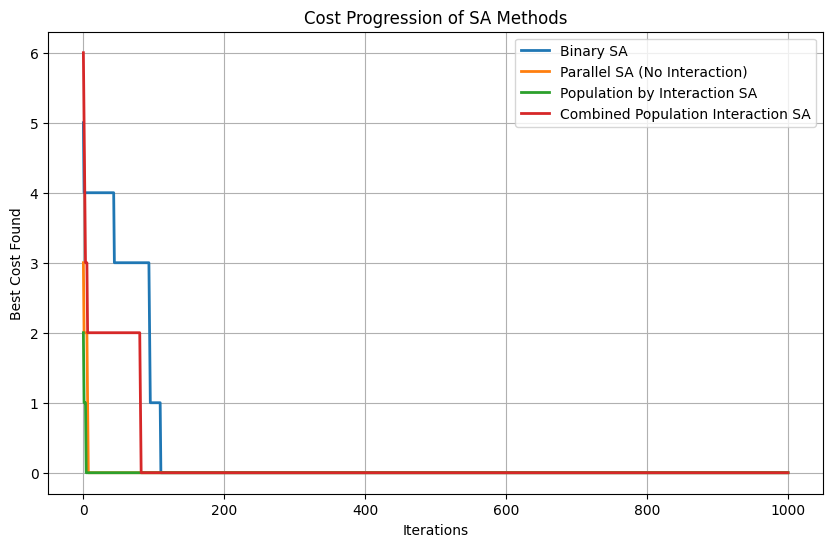

In [13]:
# Combined Population Interaction SA with cost tracking
def combined_population_interaction_sa(n, num_parents=3, num_neighbors=12, max_iter=1000, initial_temp=100, cooling_rate=0.95):
    parents = [np.random.randint(0, 2, size=n) for _ in range(num_parents)]
    parent_costs = [np.sum(parent) for parent in parents]

    best_solution = parents[np.argmin(parent_costs)]
    best_cost = min(parent_costs)

    temperature = initial_temp
    cost_progression = [best_cost]

    for _ in range(max_iter):
        neighbors = []
        for parent in parents:
            for _ in range(num_neighbors // num_parents):
                neighbor = parent.copy()
                flip_index = np.random.randint(0, n)
                neighbor[flip_index] = 1 - neighbor[flip_index]
                neighbors.append(neighbor)

        neighbor_costs = [np.sum(neighbor) for neighbor in neighbors]

        for i in range(num_parents):
            for j in range(num_neighbors):
                if neighbor_costs[j] < parent_costs[i] or np.random.rand() < np.exp(-(neighbor_costs[j] - parent_costs[i]) / temperature):
                    parents[i] = neighbors[j]
                    parent_costs[i] = neighbor_costs[j]

        min_cost_index = np.argmin(parent_costs)
        if parent_costs[min_cost_index] < best_cost:
            best_solution = parents[min_cost_index]
            best_cost = parent_costs[min_cost_index]

        cost_progression.append(best_cost)
        temperature *= cooling_rate

    return best_solution, best_cost, cost_progression

# Running the methods and collecting cost progressions
methods = [
    ("Binary SA", binary_sa),
    ("Parallel SA (No Interaction)", parallel_sa_no_interaction),
    ("Population by Interaction SA", population_by_interaction_sa),
    ("Combined Population Interaction SA", combined_population_interaction_sa)
]

n = 10  # Problem size
max_iter = 1000  # Maximum iterations
cost_progressions = {}

for name, method in methods:
    _, _, cost_progression = method(n, max_iter=max_iter)
    cost_progressions[name] = cost_progression

# Plotting cost progression over iterations
plt.figure(figsize=(10, 6))

for name, cost_prog in cost_progressions.items():
    plt.plot(range(len(cost_prog)), cost_prog, label=name, linewidth=2)

plt.xlabel("Iterations")
plt.ylabel("Best Cost Found")
plt.title("Cost Progression of SA Methods")
plt.legend()
plt.grid(True)
plt.show()